# 한국 복지 패널 데이터 분석
- 한국보건사회연구원에서 발간하는 조사자료
- 전국 7000여 가구를 선정, 2006년부터 매년 추적 조사
- 1000여개 변수로 구성

In [1]:
library(foreign) # SPSS 파일 불러오기
library(dplyr)
library(ggplot2)
library(readxl) # 엑셀 파일 불러오기


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
raw_welfare <- read.spss(file = "/content/Koweps_hpc10_2015_beta1.sav",
                        to.data.frame = T)

Warning message in read.spss(file = "/content/Koweps_hpc10_2015_beta1.sav", to.data.frame = T):
“/content/Koweps_hpc10_2015_beta1.sav: Compression bias (0) is not the usual value of 100”


In [3]:
welfare <- raw_welfare

In [4]:
head(welfare)

,h10_id,h10_ind,h10_sn,h10_merkey,h_new,h10_cobf,h10_reg5,h10_reg7,h10_din,h10_cin,⋯,c1007_4aq19,c1007_4aq20,c1007_4aq21,c1007_4aq22,c1007_4aq23,h10_pers_income1,h10_pers_income2,h10_pers_income3,h10_pers_income4,h10_pers_income5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,10101,0,NA,1,1,864,864,⋯,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
2,2,1,1,20101,0,NA,1,1,600,600,⋯,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
3,3,1,1,30101,0,NA,1,1,1571,1619,⋯,NA,NA,NA,NA,NA,NA,1440,NA,0,NA
4,4,1,1,40101,0,NA,1,1,3579,3687,⋯,NA,NA,NA,NA,NA,NA,2400,NA,0,NA
5,4,1,1,40101,0,NA,1,1,3579,3687,⋯,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
6,6,1,1,60101,0,NA,1,1,3030,3486,⋯,NA,NA,NA,NA,NA,NA,NA,3000,0,NA


In [5]:
str(welfare)

'data.frame':	16664 obs. of  957 variables:
 $ h10_id          : num  1 2 3 4 4 6 6 6 6 6 ...
 $ h10_ind         : num  1 1 1 1 1 1 1 1 1 1 ...
 $ h10_sn          : num  1 1 1 1 1 1 1 1 1 1 ...
 $ h10_merkey      : num  10101 20101 30101 40101 40101 ...
 $ h_new           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ h10_cobf        : num  NA NA NA NA NA NA NA NA NA NA ...
 $ h10_reg5        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ h10_reg7        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ h10_din         : num  864 600 1571 3579 3579 ...
 $ h10_cin         : num  864 600 1619 3687 3687 ...
 $ h10_flag        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ p10_wgl         : num  777 960 1059 1012 1075 ...
 $ p10_wsl         : num  0.257 0.317 0.35 0.334 0.355 ...
 $ p10_wgc         : num  764 949 1048 992 1057 ...
 $ p10_wsc         : num  0.252 0.314 0.346 0.328 0.349 ...
 $ h10_hc          : num  2 2 1 1 1 1 1 1 1 1 ...
 $ nh1001_1        : num  NA NA NA NA NA NA NA NA NA NA ...
 $ nh1001_2        : num  NA NA NA NA NA NA NA

In [6]:
welfare <- rename(welfare,
                  sex = h10_g3,
                  birth = h10_g4,
                  marriage = h10_g10,
                  religion = h10_g11,
                  income = p1002_8aq1,
                  code_job = h10_eco9,
                  code_region = h10_reg7)

## 성별에 따른 월급 차이

- 분석 절차
  - 변수 검토 및 전처리
    - 성별
    - 월급

  - 변수 간 관계 분석
    - 성별 월급 평균표 만들기
    - 그래프 만들기

In [7]:
# 변수 검토하기
class(welfare$sex)

[1] "numeric"

In [8]:
table(welfare$sex)


   1    2 
7578 9086 

In [9]:
# 이상치 결측 처리
welfare$sex <- ifelse(welfare$sex == 9, NA, welfare$sex)

In [10]:
# 결측치 확인
table(is.na(welfare$sex))


FALSE 
16664 

In [11]:
# 성별 항목 이름 부여
welfare$sex <- ifelse(welfare$sex == 1, "male", "female")

table(welfare$sex)


female   male 
  9086   7578 

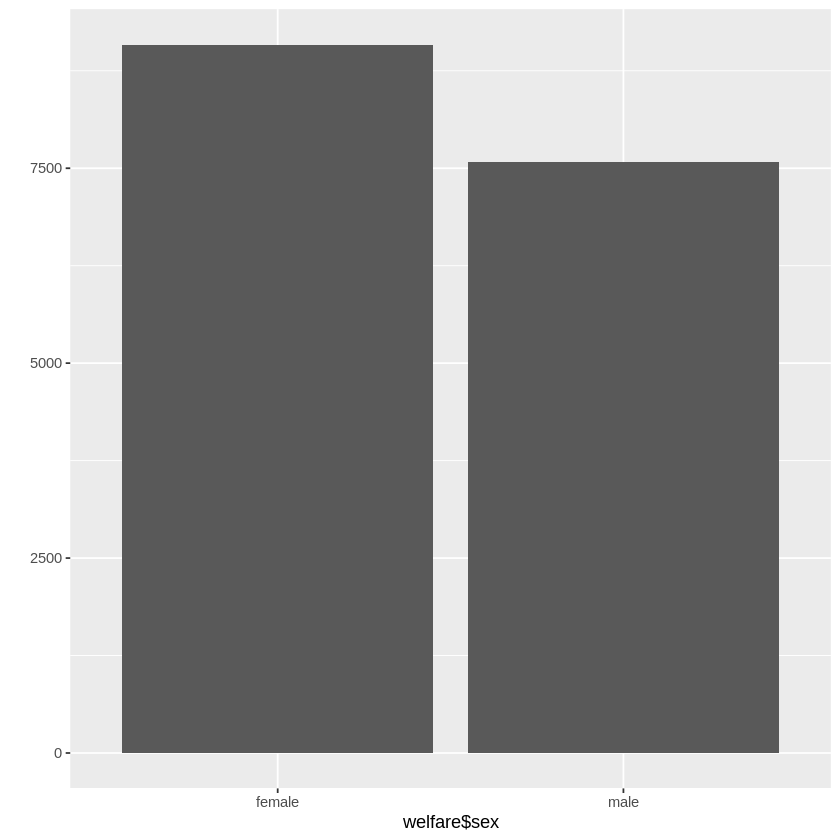

In [12]:
qplot(welfare$sex)

In [13]:
# 변수 검토하기
class(welfare$income)

[1] "numeric"

In [14]:
summary(welfare$income)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0   122.0   192.5   241.6   316.6  2400.0   12030 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 12030 rows containing non-finite values (stat_bin).”


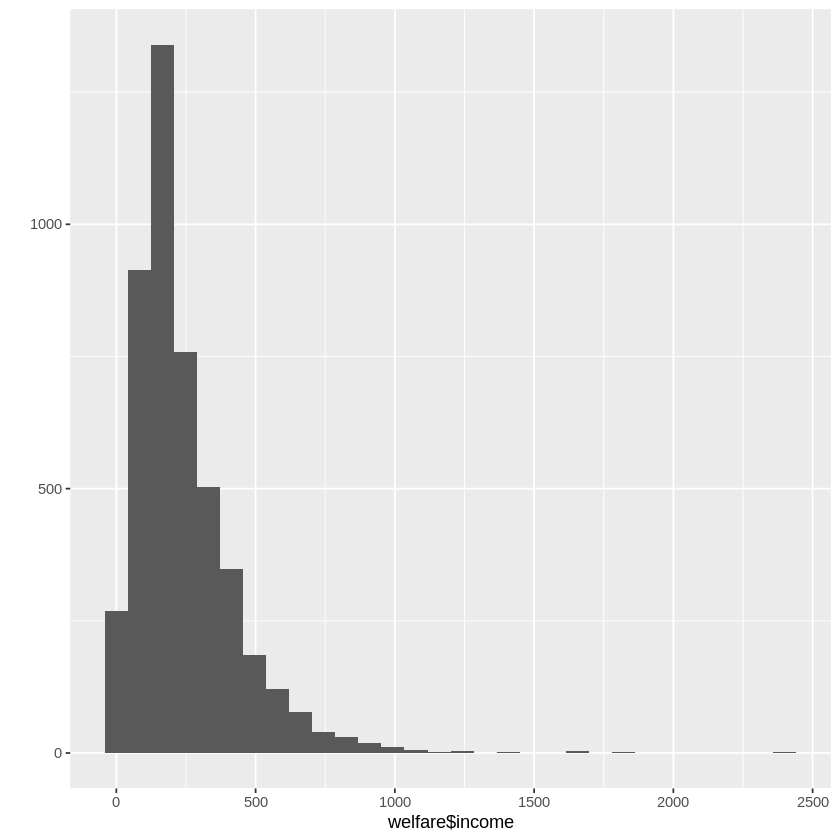

In [15]:
qplot(welfare$income)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 12051 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


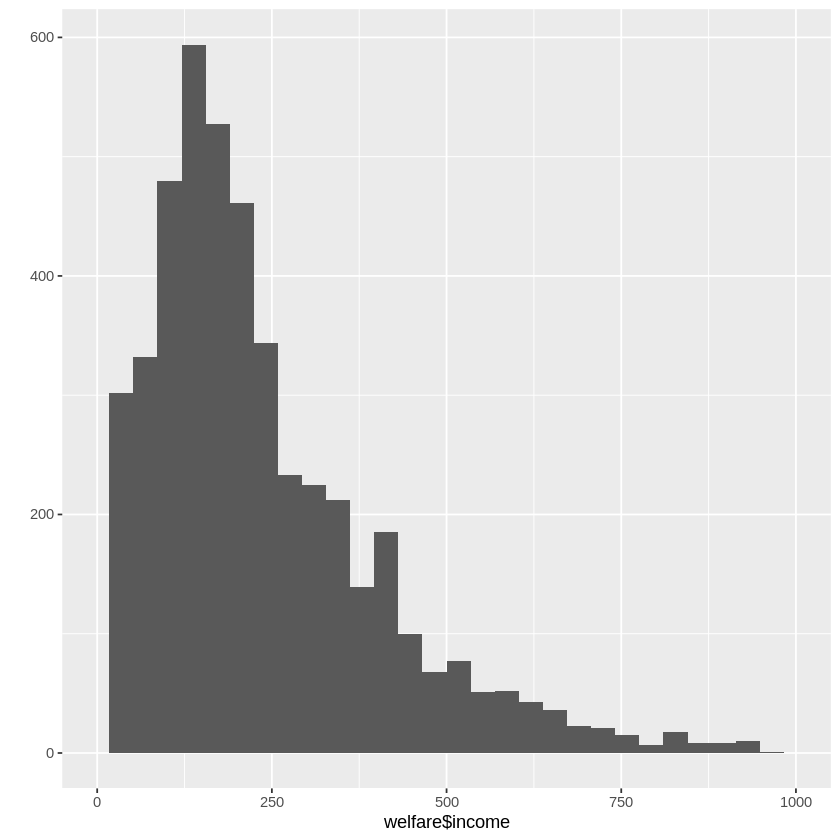

In [16]:
# 0 ~ 1000 까지의 데이터가 잘 표현되지 않음
qplot(welfare$income) + xlim(0, 1000)

In [17]:
# 이상치 확인(NA's)
summary(welfare$income)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0   122.0   192.5   241.6   316.6  2400.0   12030 

In [18]:
# 이상치 결측 처리
welfare$income <- ifelse(welfare$income %in% c(0, 9999), NA, welfare$income)

# 결측치 확인
table(is.na(welfare$income))


FALSE  TRUE 
 4620 12044 

In [19]:
# 성별 월급 평균표 만들기
sex_income <- welfare %>%
  filter(!is.na(income)) %>%
  group_by(sex) %>%
  summarise(mean_income = mean(income))

In [20]:
sex_income

sex,mean_income
<chr>,<dbl>
female,163.2471
male,312.2932


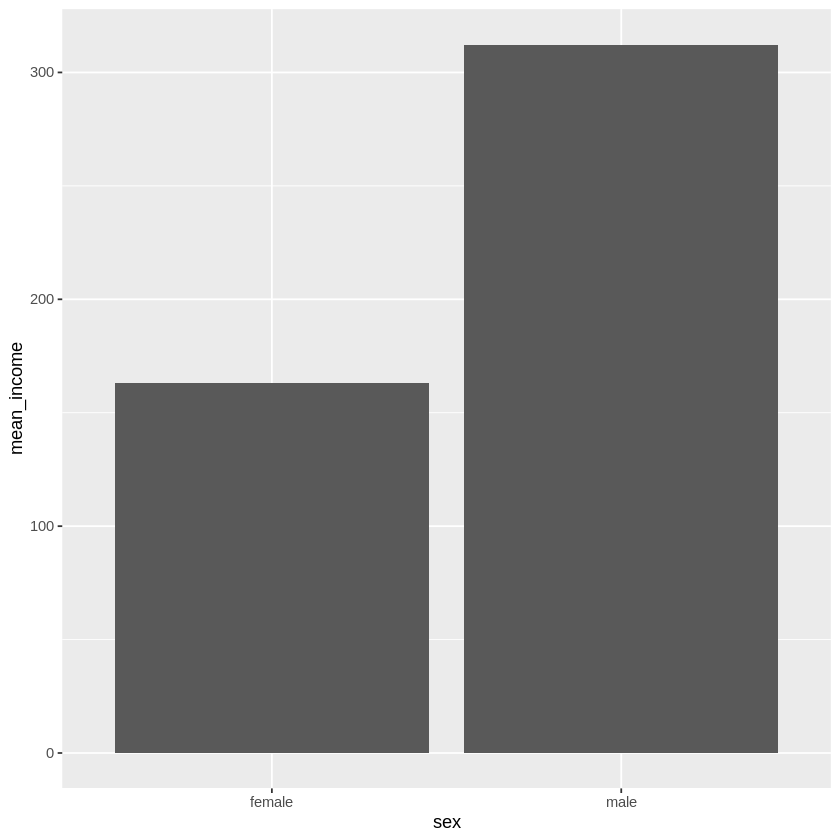

In [21]:
# 그래프 그리기
ggplot(data = sex_income, aes(x = sex, y = mean_income)) + geom_col()

# 나이와 월급의 관계

In [22]:
class(welfare$birth)

[1] "numeric"

In [23]:
summary(welfare$birth)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1907    1946    1966    1968    1988    2014 

In [24]:
welfare$age <- 2015 - welfare$birth + 1

In [25]:
summary(welfare$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00   28.00   50.00   48.43   70.00  109.00 

In [26]:
age_income <- welfare %>%
  filter(!is.na(income)) %>%
  group_by(age) %>%
  summarise(mean_income = mean(income))

In [27]:
head(age_income)

age,mean_income
<dbl>,<dbl>
20,121.3000
21,105.5185
22,130.0923
23,141.7157
24,134.0877
25,144.6559


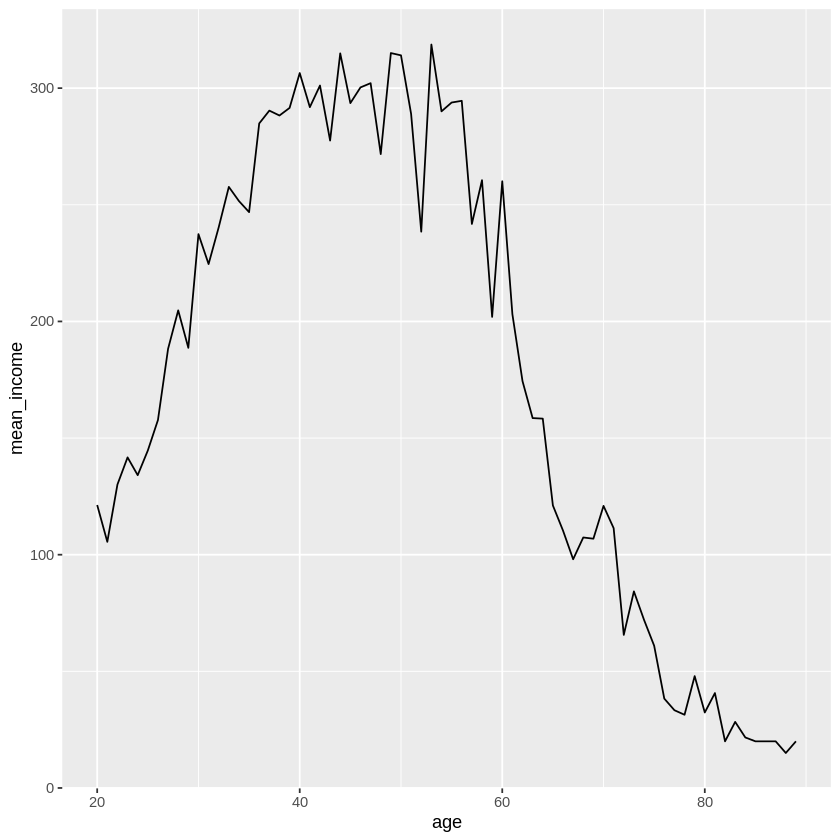

In [28]:
ggplot(data = age_income, aes(x = age, y = mean_income)) + geom_line()